In [37]:
import psutil, time, os
import pandas as pd
import dayplot as dp
import matplotlib.pyplot as plt
import polars as pl

In [38]:
CUST_100000_DIR =  "Downloads/customers-100000.csv"
CUST_200000_DIR =  "Downloads/customers-2000000.csv"

In [39]:

proc = psutil.Process(os.getpid())
def get_memory():
    memory = proc.memory_info().rss / (1024**2)
    # print(f"{condition} ={memory:.1f} MB")
    return memory
    

#### 1. Parse customer-10000.csv

In [40]:
df = pd.read_csv(CUST_100000_DIR, dtype=str)
df = df.drop(columns=["Index"])
df.head()

,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
0,ffeCAb7AbcB0f07,Jared,Jarvis,Sanchez-Fletcher,Hatfieldshire,Eritrea,274.188.8773x41185,001-215-760-4642x969,gabriellehartman@benjamin.com,2021-11-11,https://www.mccarthy.info/
1,b687FfC4F1600eC,Marie,Malone,Mckay PLC,Robertsonburgh,Botswana,283-236-9529,(189)129-8356x63741,kstafford@sexton.com,2021-05-14,http://www.reynolds.com/
2,9FF9ACbc69dcF9c,Elijah,Barrera,Marks and Sons,Kimbury,Barbados,8252703789,459-916-7241x0909,jeanettecross@brown.com,2021-03-17,https://neal.com/
3,b49edDB1295FF6E,Sheryl,Montgomery,"Kirby, Vaughn and Sanders",Briannaview,Antarctica (the territory South of 60 deg S),425.475.3586,(392)819-9063,thomassierra@barrett.com,2020-09-23,https://www.powell-bryan.com/
4,3dcCbFEB17CCf2E,Jeremy,Houston,Lester-Manning,South Brianna,Micronesia,+1-223-666-5313x4530,252-488-3850x692,rubenwatkins@jacobs-wallace.info,2020-09-18,https://www.carrillo.com/


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Customer Id        100000 non-null  object
 1   First Name         100000 non-null  object
 2   Last Name          100000 non-null  object
 3   Company            100000 non-null  object
 4   City               100000 non-null  object
 5   Country            100000 non-null  object
 6   Phone 1            100000 non-null  object
 7   Phone 2            100000 non-null  object
 8   Email              100000 non-null  object
 9   Subscription Date  100000 non-null  object
 10  Website            100000 non-null  object
dtypes: object(11)
memory usage: 8.4+ MB


There's no null and all of them are imported as string. Next, we'll try to focus on the basic statistic of the data. How many unique values & frequencies

In [42]:
df.describe()

,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,100000,690,1000,71994,49154,243,100000,100000,99995,880,50471
top,ffeCAb7AbcB0f07,Joan,Campbell,Wilkerson Ltd,Lake Frederick,Congo,274.188.8773x41185,001-215-760-4642x969,julia03@briggs.com,2020-12-11,https://guzman.com/
freq,1,183,139,17,16,835,1,1,2,155,22


Since there's no information provided from the assignment. I assume that this data represent subscriber information to our service. The website provided is their personal/company website.
From the describe table, I'm trying to get insights focusing on several columns:
- Subscription date -> Month/date that has the most popular 
- Email -> How many people have the same email?

##### 1.1 Visualization of the subscription time

In [43]:
df["Subscription Date"] = pd.to_datetime(df["Subscription Date"])
daily_data = df.groupby(df["Subscription Date"].dt.date).size().rename("count")
daily_data = daily_data.reset_index().rename(columns={"Subscription Date":"date"})

daily_data

,date,count
0,2020-01-01,108
1,2020-01-02,112
2,2020-01-03,108
3,2020-01-04,113
4,2020-01-05,121
...,...,...
875,2022-05-25,118
876,2022-05-26,121
877,2022-05-27,123
878,2022-05-28,114


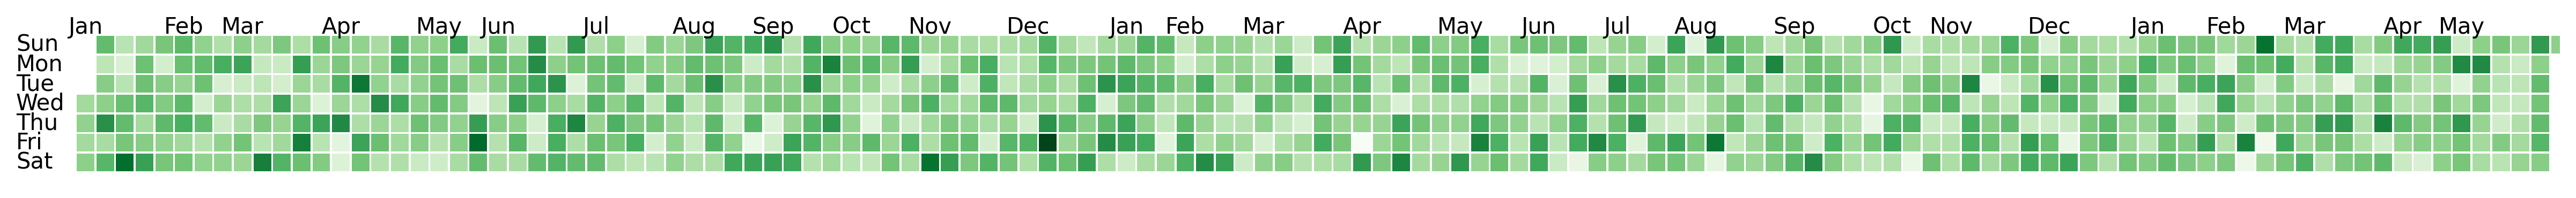

In [44]:
fig, ax = plt.subplots(figsize=(20, 15), dpi=300)
dp.calendar(dates=daily_data["date"],
            values=daily_data["count"],
            start_date=daily_data["date"].min(),
            end_date=daily_data["date"].max(),
ax=ax)
plt.show() 

It seems that there's no significant insight based on the subscription data. Let's try to limit the country to only one to see a pattern within for a specific market. Let's find a country with the most subscribers to our service.

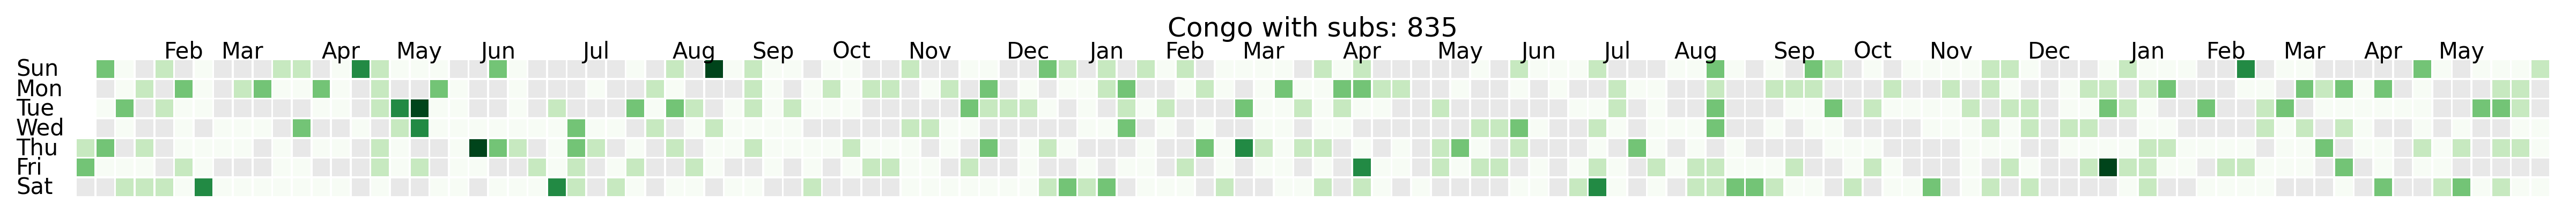

In [45]:
country = df["Country"].value_counts().index[0]
total_subs = df["Country"].value_counts()[country]
df_country = df[df["Country"]==country]

country_daily_data = df_country.groupby(df["Subscription Date"].dt.date).size().rename("count")
country_daily_data = country_daily_data.reset_index().rename(columns={"Subscription Date":"date"})

fig, ax = plt.subplots(figsize=(20, 15), dpi=300)
dp.calendar(dates=country_daily_data["date"],
            values=country_daily_data["count"],
            start_date=country_daily_data["date"].min(),
            end_date=country_daily_data["date"].max(),
ax=ax)

title = f"{country} with subs: {total_subs}"
plt.title(title)
plt.show() 

Congo has the most subscriber for our service. It is found that there's a spike of subscribes happening in the middle of May and the first week of January.Based on this insight, we have to know what happened during that time that contibute to the spike of subscribers.

There's also a trend in August during saturdays and on the third week of August. However, to get more impactful insight, further exploration need to be done. This kind of information in very useful for the marketing team, since they could identify when is the right time/which funnel that works to increase our subscribers.

In [46]:
del daily_data, country_daily_data

##### 1.2 Customer with same email

In [47]:
duplicate = df["Email"].value_counts()[lambda x: x>1]
print(duplicate)

Email
julia03@briggs.com       2
kwalls@white.com         2
imitchell@church.com     2
vgeorge@mendoza.com      2
ushields@saunders.com    2
Name: count, dtype: int64


In [48]:
df[df["Email"].isin(duplicate.index)].sort_values(by="Email", ascending=True)

,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
85112,5BcEBD82eBFf102,Charles,Freeman,"Barry, Gaines and Carroll",West Paulachester,American Samoa,236.552.5818x755,001-769-131-3193x577,imitchell@church.com,2021-02-21,https://boyer.com/
93818,DDdA80d1beD99b6,Joshua,Gallegos,Richards LLC,Cameronport,El Salvador,(258)418-2361,+1-921-284-1924x04056,imitchell@church.com,2020-10-08,http://www.parks.net/
90751,8A2E9e5af981CBd,Alvin,Stephens,Bolton-Torres,New Rose,Liechtenstein,2986388860,+1-337-311-2845x19687,julia03@briggs.com,2022-05-16,http://cortez.info/
96681,64ff4a97cCF99Da,Kathy,Rojas,Burke-Schroeder,Reginaldland,Ghana,001-570-596-7205x878,152.042.4114x03141,julia03@briggs.com,2020-04-17,http://www.adkins-carney.com/
18196,EdAD6f6E81F68Fc,Alison,Archer,Scott-Buchanan,Port Louisview,Central African Republic,768.406.8659x43604,+1-100-273-2543x287,kwalls@white.com,2020-08-02,https://www.jensen.info/
95616,d44BCA84DEAf5EB,Lindsey,Carson,Boyd-Mcneil,Guyview,Dominica,578-691-0803x5139,+1-775-538-6716,kwalls@white.com,2020-04-13,https://www.marsh.org/
31997,B29Fb3EF18604f8,Jaclyn,Torres,"Valencia, Newton and Carroll",Grahamchester,Kyrgyz Republic,626-732-3135x08645,+1-427-189-3094x844,ushields@saunders.com,2020-10-30,http://quinn.com/
73003,C2DB1665c793Df8,Cristina,Cox,"Meyer, Davenport and Bailey",New Andreaburgh,Montenegro,0846366325,(499)958-9874,ushields@saunders.com,2021-04-29,http://www.baldwin-shepard.com/
30556,b0E5A8E4E2beF72,Tammy,Ramirez,Horne PLC,West Dennis,Sweden,+1-038-417-7519,+1-325-182-4881,vgeorge@mendoza.com,2022-04-17,https://horton.com/
71528,b6Bcf35CE3e63b6,Kenneth,Mcpherson,Fuentes-Conrad,New Markland,Finland,001-705-413-9892x527,693.786.5328,vgeorge@mendoza.com,2021-12-19,http://hobbs-campbell.com/


There are 5 emails that being used twice; which means that the system didn't validate if the email already existed in the DB. This insight would be useful for the team that developing the system to create a validation layer to ensure email is a unique id. 

In [49]:
del df

#### 2. Parse large CSV and keep the memory low
Assumption: 
- Disk space is not a constraint, only the RAM size.
- The input is the customers-2000000.csv, not the customers-2000000.zip file

In [50]:
data = pl.scan_csv(CUST_200000_DIR)
print(data.head())

naive plan: (run LazyFrame.explain(optimized=True) to see the optimized plan)

SLICE[offset: 0, len: 5]
  Csv SCAN [Downloads/customers-2000000.csv]
  PROJECT */12 COLUMNS
  ESTIMATED ROWS: 2072829


#### 3. Comparison of small data & big data
Since it does not specify why split means, I assume it is still related to the previous question; In terms of memory size, how does loading the small & big data differs?

Pandas is a quite popular library to analyze data, however, they could not handle large data since they load all of them to the memory. This approach was being handled by polars, a new library that could lazily handle big csv data.

I'll try to compare what's the difference between loading both small & big data in pandas. Then we'll compare them in polars.

##### 3.1 Small vs Big data in pandas

In [54]:
before_small = get_memory()
small_pd = pd.read_csv(CUST_100000_DIR)
after_small = get_memory()
diff_small = after_small - before_small
print(f"Loading small data in Pandas {diff_small} MB")
del small_pd

before_big = get_memory()
big_pd = pd.read_csv(CUST_200000_DIR)
after_big = get_memory()
diff_big = after_big-before_big
print(f"Loading big data in Pandas {diff_big} MB")
del big_pd

Loading small data in Pandas 25.09375 MB
Loading big data in Pandas 924.03125 MB


##### 3.2 Small vs Big data in Polars

In [55]:
before_small = get_memory()
small_pd = pl.scan_csv(CUST_100000_DIR)
after_small = get_memory()
diff_small = after_small - before_small
print(f"Loading small data in Polars {diff_small} MB")
del small_pd

before_big = get_memory()
big_pd = pl.scan_csv(CUST_200000_DIR)
after_big = get_memory()
diff_big = after_big-before_big
print(f"Loading big data in Polars {diff_big} MB")
del big_pd

Loading small data in Polars 0.0078125 MB
Loading big data in Polars 0.00390625 MB
